<a href="https://colab.research.google.com/github/quachthanhhmd/I-learn-DeepLearning/blob/main/trafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
cd /content/drive/My Drive/ML/data

/content/drive/My Drive/ML/data


In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6a24522d40d8afdb229d00aab3b69c46973d9052a38c69bfa34d8bfb1f4736fb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data.zip'

In [ ]:

!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [14]:
#link of data
data = './'
train_link = data + 'train.p'
test_link = data + 'test.p'
valid_link = data + 'valid.p'

In [16]:
import pickle

In [17]:
with open(train_link, mode = 'rb') as f:
  train = pickle.load(f)

with open(test_link, mode = 'rb') as f:
  test = pickle.load(f)

with open(valid_link, mode = 'rb') as f:
  valid = pickle.load(f)


In [18]:
X_train = train['features']
y_train = train['labels']

X_valid = valid['features']
y_valid = valid['labels']

X_test = test['features']
y_test = test['labels']

In [19]:
y_train.shape

(34799,)

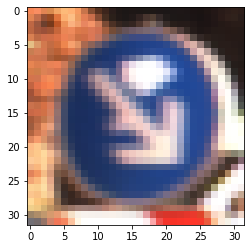

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_train[14213])


In [21]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [22]:
#trao nhan di kem de bao dam tinh tong quat cua du lieu
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [23]:
X_train = X_train.astype('float') / 255.0
X_valid = X_valid.astype('float') / 255.0
X_test = X_test.astype('float') / 255.0


In [24]:
from sklearn.preprocessing import LabelBinarizer

In [25]:
lb = LabelBinarizer()

In [26]:
y_train = lb.fit_transform(y_train)
y_valid = lb.fit_transform(y_valid)
y_test = lb.fit_transform(y_test)



In [27]:
y_valid[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D, Activation, Dropout, Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [66]:
model = Sequential()

In [67]:
width = 32
height = 32
classes = len(classNames)
shape = (width, height, 3)

In [68]:
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [69]:
model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [70]:
model.add(MaxPooling2D(2,2))

In [71]:
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [72]:
model.add(Flatten())

In [73]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [74]:
model.add(Dense(classes))
model.add(Activation('softmax'))

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [76]:
arg = ImageDataGenerator(rotation_range= 0.18, zoom_range= 0.15, width_shift_range=0.2, horizontal_flip=True)

In [79]:
learning_rate = 0.01
epochs = 10
batch_size = 64

In [80]:
opt = SGD(learning_rate=learning_rate, momentum= 0.9)

In [87]:
model.compile(optimizer= opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [88]:
y_train.shape

(34799, 43)

In [89]:
h = model.fit_generator(arg.flow(X_train, y_train, batch_size= batch_size), validation_data= (X_valid, y_valid), steps_per_epoch= X_train.shape[0]//batch_size, epochs=epochs, verbose=1)

Epoch 1/10
543/543 [==============================] - 26s 48ms/step - loss: 0.9157 - accuracy: 0.7313 - val_loss: 0.7466 - val_accuracy: 0.7549
Epoch 2/10
543/543 [==============================] - 26s 47ms/step - loss: 0.2342 - accuracy: 0.9262 - val_loss: 0.5041 - val_accuracy: 0.8399
Epoch 3/10
543/543 [==============================] - 26s 47ms/step - loss: 0.1340 - accuracy: 0.9587 - val_loss: 0.5074 - val_accuracy: 0.8444
Epoch 4/10
543/543 [==============================] - 26s 47ms/step - loss: 0.0959 - accuracy: 0.9716 - val_loss: 0.4986 - val_accuracy: 0.8553
Epoch 5/10
543/543 [==============================] - 26s 48ms/step - loss: 0.0707 - accuracy: 0.9796 - val_loss: 0.5690 - val_accuracy: 0.8420
Epoch 6/10
543/543 [==============================] - 26s 47ms/step - loss: 0.0554 - accuracy: 0.9841 - val_loss: 0.4121 - val_accuracy: 0.8871
Epoch 7/10
543/543 [==============================] - 26s 47ms/step - loss: 0.0438 - accuracy: 0.9874 - val_loss: 0.5336 - val_accuracy:

In [119]:
X_test[90:91].shape

(1, 32, 32, 3)

In [120]:
res = model.predict(X_test[90:91])

In [109]:
import numpy as np


In [121]:
final = np.argmax(res)
final = classNames[final]

In [122]:
final

'Speed limit (60km/h)'

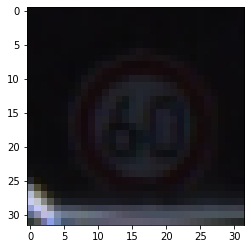

In [123]:
plt.imshow(X_test[90])